In [15]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics.cluster import calinski_harabaz_score, adjusted_rand_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline


In [16]:
kick_proc = pd.read_pickle('../../data/03_processed/kick_proc.pkl')
kick_proc.head()

,currency,goal_original,id,category,country,blurb_word_count,campaign_length,delta_created_launched,goal_usd,successful_dummy,world_regions
0,USD,5000.0,1175125319,Tabletop Games,US,9.0,32,13,5000.0,1,Northern America
1,USD,3500.0,920424993,Music,US,14.0,18,1,3500.0,1,Northern America
2,USD,500.0,1253520992,Zines,US,17.0,15,1,500.0,1,Northern America
3,USD,6800.0,335137457,Graphic Novels,US,12.0,30,6,6800.0,1,Northern America
4,USD,600.0,58084093,Mixed Media,US,19.0,30,0,600.0,1,Northern America


Going to remove Currency and Country so they don't get dummied.
Going to use StandardScaler for  
    - 'goal_usd', 
    - 'blurb_word_count', 
    - 'campaign_length' , 
    - 'delta_created_launched'

In [17]:
kick_proc.drop(columns=['currency', 'goal_original', 'country'], inplace=True)

In [18]:
y = kick_proc['successful_dummy']
df_no_y = kick_proc.drop('successful_dummy', axis=1)
X = pd.get_dummies(df_no_y)

In [19]:
X[['blurb_word_count']] = StandardScaler().fit_transform(X[['blurb_word_count']])
X[['campaign_length']] = StandardScaler().fit_transform(X[['campaign_length']])
X[['delta_created_launched']] = StandardScaler().fit_transform(X[['delta_created_launched']])
X[['goal_usd']] = StandardScaler().fit_transform(X[['goal_usd']])

We turned segmented "Country" into global region 

### Interpretation of KMeans vs Agglom Clustering Results?

In [20]:
## Would having two clusters here be like asking for a prediction on whether the project 
## was a success or not? If so, then we'd feed in the test data and see how well it did at 
## predicting? 


k_means = KMeans(n_clusters = 4)
k_means.fit(X)
cluster_preds = k_means.predict(X)

What does this all mean? 
Should I now map the new category label into the df and then convert it to dummy variable and
use it as a feature in the other models? 

In [21]:
# adjusted_rand_score(y_test, cluster_preds)

## Need to try agglom now

In [22]:
cluster_pred_df = pd.DataFrame(cluster_preds)

In [23]:
kick_proc['cluster_predictions'] = cluster_preds

In [24]:
kick_proc.head()

,id,category,blurb_word_count,campaign_length,delta_created_launched,goal_usd,successful_dummy,world_regions,cluster_predictions
0,1175125319,Tabletop Games,9.0,32,13,5000.0,1,Northern America,3
1,920424993,Music,14.0,18,1,3500.0,1,Northern America,0
2,1253520992,Zines,17.0,15,1,500.0,1,Northern America,3
3,335137457,Graphic Novels,12.0,30,6,6800.0,1,Northern America,2
4,58084093,Mixed Media,19.0,30,0,600.0,1,Northern America,2


In [25]:
new_features = kick_proc[['id', 'cluster_predictions']]

In [26]:
new_features.cluster_predictions.value_counts()

2    69456
3    68981
0    68603
1    68602
Name: cluster_predictions, dtype: int64

In [28]:
new_features

,id,cluster_predictions
0,1175125319,3
1,920424993,0
2,1253520992,3
3,335137457,2
4,58084093,2
5,1117025715,3
6,750949205,0
7,1852138418,1
8,46781774,2
9,1598130539,3


In [32]:
# new_features.to_csv('../../data/03_processed/KNN_cluster_features_4.csv')

In [29]:
new_features.to_pickle('../../data/04_models/KNN_cluster_features_4.pkl')

## RANDOM CORRELATION MATRIX STUFF

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1aa4c390>,
      dtype=object)

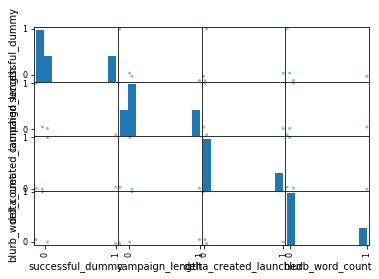

In [26]:
pd.plotting.scatter_matrix(kick_proc[['successful_dummy', 'campaign_length', 'delta_created_launched', 'blurb_word_count']].corr())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a238e8630>,
      dtype=object)

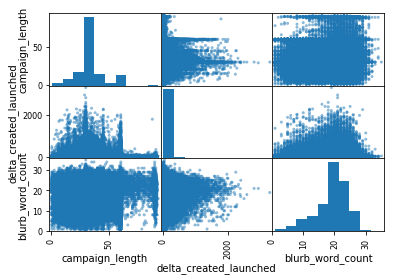

In [27]:
pd.plotting.scatter_matrix(kick_proc[['campaign_length', 'delta_created_launched', 'blurb_word_count']])